# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from keras.datasets import mnist
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

np.random.seed(42)

Using TensorFlow backend.


# Loading Data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

11493376/11490434 [==============================] - 2s 0us/step
X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


# Visualization Data

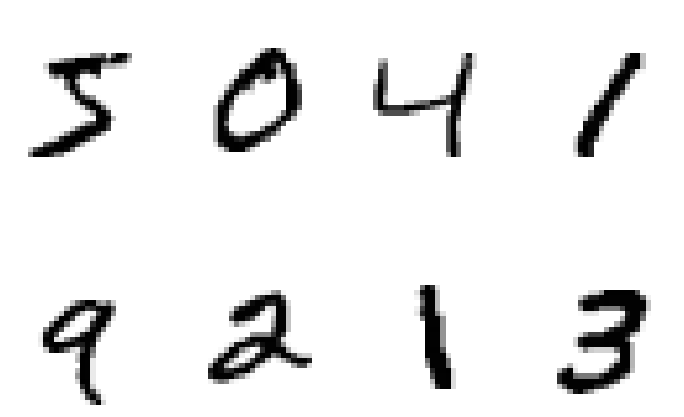

In [3]:
plt.figure(figsize=(12,8))
for i in range(8):
  plt.subplot(240 + i + 1)
  plt.imshow(X_train[i], cmap='gray_r')
  plt.title(y_train[i], color='white', fontsize=17)
  plt.axis('off')
plt.show()

In [4]:
X_train = X_train[:10000]
y_train = y_train[:10000]
X_train = X_train.reshape(-1,28*28)
X_train.shape

(10000, 784)

# Standarization

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

# PCA

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_train_pca.shape

(10000, 3)

# Explained Variance

In [7]:
results = pd.DataFrame(data={
    'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

explained_variance_ratio  cumulative  component
0                  0.061640    0.061640          1
1                  0.043662    0.105302          2
2                  0.040458    0.145760          3

In [8]:
fig = go.Figure(data=[go.Bar(x=results['component'],
                             y=results['explained_variance_ratio'],
                             name='explained_variance_ratio'),
                      go.Scatter(x=results['component'],
                                 y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 components', width=950,
                                 template='plotly_dark'))
fig.show()

In [9]:
X_train_pca_df = pd.DataFrame(data=np.c_[X_train_pca, y_train], 
                              columns=['pca_1', 'pca_2', 'pca_3', 'class'])
X_train_pca_df['class'] = X_train_pca_df['class'].astype(str)
X_train_pca_df.head()

pca_1      pca_2     pca_3 class
0 -0.997652  -4.652699 -0.740638   5.0
1  8.682758  -7.123700 -4.194685   0.0
2  2.439059  10.567253 -4.058946   4.0
3 -7.291486  -3.686136  3.065267   1.0
4 -4.791478   4.498237 -5.603298   9.0

In [10]:
px.scatter(X_train_pca_df, x='pca_1', y='pca_2', color='class',opacity=0.5,
           width=950, title='PCA - 2 Components', template='plotly_dark')

In [13]:
px.scatter_3d(X_train_pca_df, x='pca_1', y='pca_2', z='pca_3', color='class',
           opacity=0.5, height=700, width=950, title='PCA - 3 Components',
           template='plotly_dark')

# t-SNE

t-SNE 2 components

In [15]:
from sklearn.manifold import TSNE

tsne= TSNE(n_components=2, verbose=1)
X_train_tsne = tsne.fit_transform(X_train_std)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.002s...
[t-SNE] Computed neighbors for 10000 samples in 180.792s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.161201
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.463593
[t-SNE] KL divergence after 1000 iterations: 1.717055


In [16]:
X_train_tsne_df = pd.DataFrame(data=np.c_[X_train_tsne, y_train], 
                               columns=['tsne_1', 'tsne_2', 'class'])
X_train_tsne_df['class'] = X_train_tsne_df['class'].astype(str)
X_train_tsne_df

tsne_1     tsne_2 class
0     12.473772 -33.515553   5.0
1     68.135033  17.868418   0.0
2     -4.705827  67.267838   4.0
3    -50.587410 -34.830677   1.0
4    -50.632835  51.756950   9.0
...         ...        ...   ...
9995   6.150591 -58.521179   5.0
9996   7.073588   1.352484   8.0
9997  53.151417 -32.478165   6.0
9998 -37.292786  38.642384   9.0
9999 -81.840477   6.966213   7.0

[10000 rows x 3 columns]

# Visualization t-SNE

In [17]:
px.scatter(X_train_tsne_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5,
           width=950, height=700, template='plotly_dark', 
           title='TSNE 2 components')

# Comparison PCA vs t-SNE

In [18]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, subplot_titles=['PCA', 't-SNE'], 
                    horizontal_spacing =0.03)
fig1 = px.scatter(X_train_pca_df, x='pca_1', y='pca_2', color='class', 
                  opacity=0.5)
fig2 = px.scatter(X_train_tsne_df, x='tsne_1', y='tsne_2', color='class', 
                  opacity=0.5)

for i in range(0,10):
  fig.add_trace(fig1['data'][i], row=1, col=1)
  fig.add_trace(fig2['data'][i], row=1, col=2)
fig.update_layout(width=950, showlegend=False, template='plotly_dark')
fig.show()

# 50 Components

In [20]:
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_std)
X_train_pca.shape

(10000, 50)

In [21]:
tsne = TSNE(n_components=2, verbose=1)
X_train_tsne_50 = tsne.fit_transform(X_train_pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.070s...
[t-SNE] Computed neighbors for 10000 samples in 11.057s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.787282
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.483582
[t-SNE] KL divergence after 1000 iterations: 1.644062


In [22]:
X_train_tsne_50_df = pd.DataFrame(data=np.c_[X_train_tsne_50, y_train], 
                                  columns=['tsne_1', 'tsne_2', 'class'])
X_train_tsne_50_df['class'] = X_train_tsne_50_df['class'].astype(str)
X_train_tsne_50_df

tsne_1     tsne_2 class
0     -0.656927  16.596449   5.0
1    -64.739479  10.803540   0.0
2     25.362804  54.647800   4.0
3     51.526371 -46.320583   1.0
4     54.565273  27.913399   9.0
...         ...        ...   ...
9995 -33.470829  49.683010   5.0
9996   3.412867  25.465445   8.0
9997 -31.913675 -62.449825   6.0
9998  51.306297  24.996433   9.0
9999  70.331299 -14.872558   7.0

[10000 rows x 3 columns]

In [24]:
px.scatter(X_train_tsne_50_df, x='tsne_1', y='tsne_2', color='class', 
           opacity=0.5, width=950, height=700, template='plotly_dark', 
           title='t-SNE - 2 components after PCA')

In [25]:
fig = make_subplots(rows=1, cols=3, 
                    subplot_titles=['PCA', 't-SNE', 't-SNE after PCA'],
                    horizontal_spacing=0.03)
fig1 = px.scatter(X_train_pca_df, x='pca_1', y='pca_2', color='class', 
                  opacity=0.5)
fig2 = px.scatter(X_train_tsne_df, x='tsne_1', y='tsne_2', color='class', 
                  opacity=0.5)
fig3 = px.scatter(X_train_tsne_50_df, x='tsne_1', y='tsne_2', color='class',
                  opacity=0.5)
for i in range(0,10):
  fig.add_trace(fig1['data'][i], row=1, col=1)
  fig.add_trace(fig2['data'][i], row=1, col=2)
  fig.add_trace(fig3['data'][i], row=1, col=3)
fig.update_layout(width=950, height=450, showlegend=False, 
                  template='plotly_dark')
fig.show()

# 3 Components

In [26]:
tsne = TSNE(n_components=3, verbose=1)
X_train_tsne = tsne.fit_transform(X_train_pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.063s...
[t-SNE] Computed neighbors for 10000 samples in 11.747s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.787282
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.392883
[t-SNE] KL divergence after 1000 iterations: 1.455867


In [27]:
X_train_tsne_df = pd.DataFrame(data=np.c_[X_train_tsne, y_train], 
                               columns=['tsne_1', 'tsne_2', 'tsne_3', 'class'])
X_train_tsne_df['class'] = X_train_tsne_df['class'].astype(str)
X_train_tsne_df

tsne_1     tsne_2     tsne_3 class
0     -8.112544 -13.678142  -2.640202   5.0
1    -20.884356   8.176948   4.659027   0.0
2     -4.708239  18.882223  -4.102376   4.0
3      4.219370 -17.633669  -3.169011   1.0
4     10.891311  11.368185  -6.675416   9.0
...         ...        ...        ...   ...
9995 -14.967123  -2.305447  -6.252939   5.0
9996  -2.060371   2.889879  -5.800522   8.0
9997  -8.490482 -10.801247  19.782667   6.0
9998   8.766894   9.154789  -7.296952   9.0
9999  15.234674  -4.612966 -12.706563   7.0

[10000 rows x 4 columns]

In [28]:
px.scatter_3d(X_train_tsne_df, x='tsne_1', y='tsne_2', z='tsne_3',
              color='class', opacity=0.5, width=950, height=700,
           template='plotly_dark', title='TSNE - 3 components')